# Feature Scaling Techniques Demonstration

This notebook demonstrates four common feature scaling techniques using the Wine dataset from scikit-learn:

1. **StandardScaler**: Zero mean, unit variance (z-score normalization)
2. **MinMaxScaler**: Scales features to [0, 1] range
3. **RobustScaler**: Robust to outliers (uses median & Interquartile Range (IQR))
4. **Normalizer**: Scales each sample to unit norm (L2 = 1)

## Learning Objectives
- Understand when and why to use different scaling techniques
- Learn the mathematical formulas behind each scaler
- Visualize the effects of scaling on real data
- Apply best practices for preprocessing in ML pipelines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore the Dataset

In [2]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print("=== WINE DATASET OVERVIEW ===")
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Number of classes: {len(target_names)}")
print(f"Target classes: {target_names}")
print(f"\nFeature names: {list(feature_names)}")

=== WINE DATASET OVERVIEW ===
Dataset shape: (178, 13)
Number of features: 13
Number of classes: 3
Target classes: ['class_0' 'class_1' 'class_2']

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("=== DATASET STATISTICS ===")
print(df.describe().round(2))

=== DATASET STATISTICS ===
       alcohol  malic_acid     ash  alcalinity_of_ash  magnesium  \
count   178.00      178.00  178.00             178.00     178.00   
mean     13.00        2.34    2.37              19.49      99.74   
std       0.81        1.12    0.27               3.34      14.28   
min      11.03        0.74    1.36              10.60      70.00   
25%      12.36        1.60    2.21              17.20      88.00   
50%      13.05        1.87    2.36              19.50      98.00   
75%      13.68        3.08    2.56              21.50     107.00   
max      14.83        5.80    3.23              30.00     162.00   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count         178.00      178.00                178.00           178.00   
mean            2.30        2.03                  0.36             1.59   
std             0.63        1.00                  0.12             0.57   
min             0.98        0.34                  0.13      

## 3. Visualize the Scale Differences

Let's see why scaling is necessary by examining the different scales of our features.

In [4]:
# Select features with different scales for demonstration
selected_features = ['alcohol', 'magnesium', 'proline', 'color_intensity']
selected_data = df[selected_features]

# Show scale differences
print("=== FEATURE SCALE DIFFERENCES ===")
for feature in selected_features:
    min_val = selected_data[feature].min()
    max_val = selected_data[feature].max()
    range_val = max_val - min_val
    print(f"{feature:15s}: Min={min_val:8.2f}, Max={max_val:8.2f}, Range={range_val:8.2f}")

=== FEATURE SCALE DIFFERENCES ===
alcohol        : Min=   11.03, Max=   14.83, Range=    3.80
magnesium      : Min=   70.00, Max=  162.00, Range=   92.00
proline        : Min=  278.00, Max= 1680.00, Range= 1402.00
color_intensity: Min=    1.28, Max=   13.00, Range=   11.72


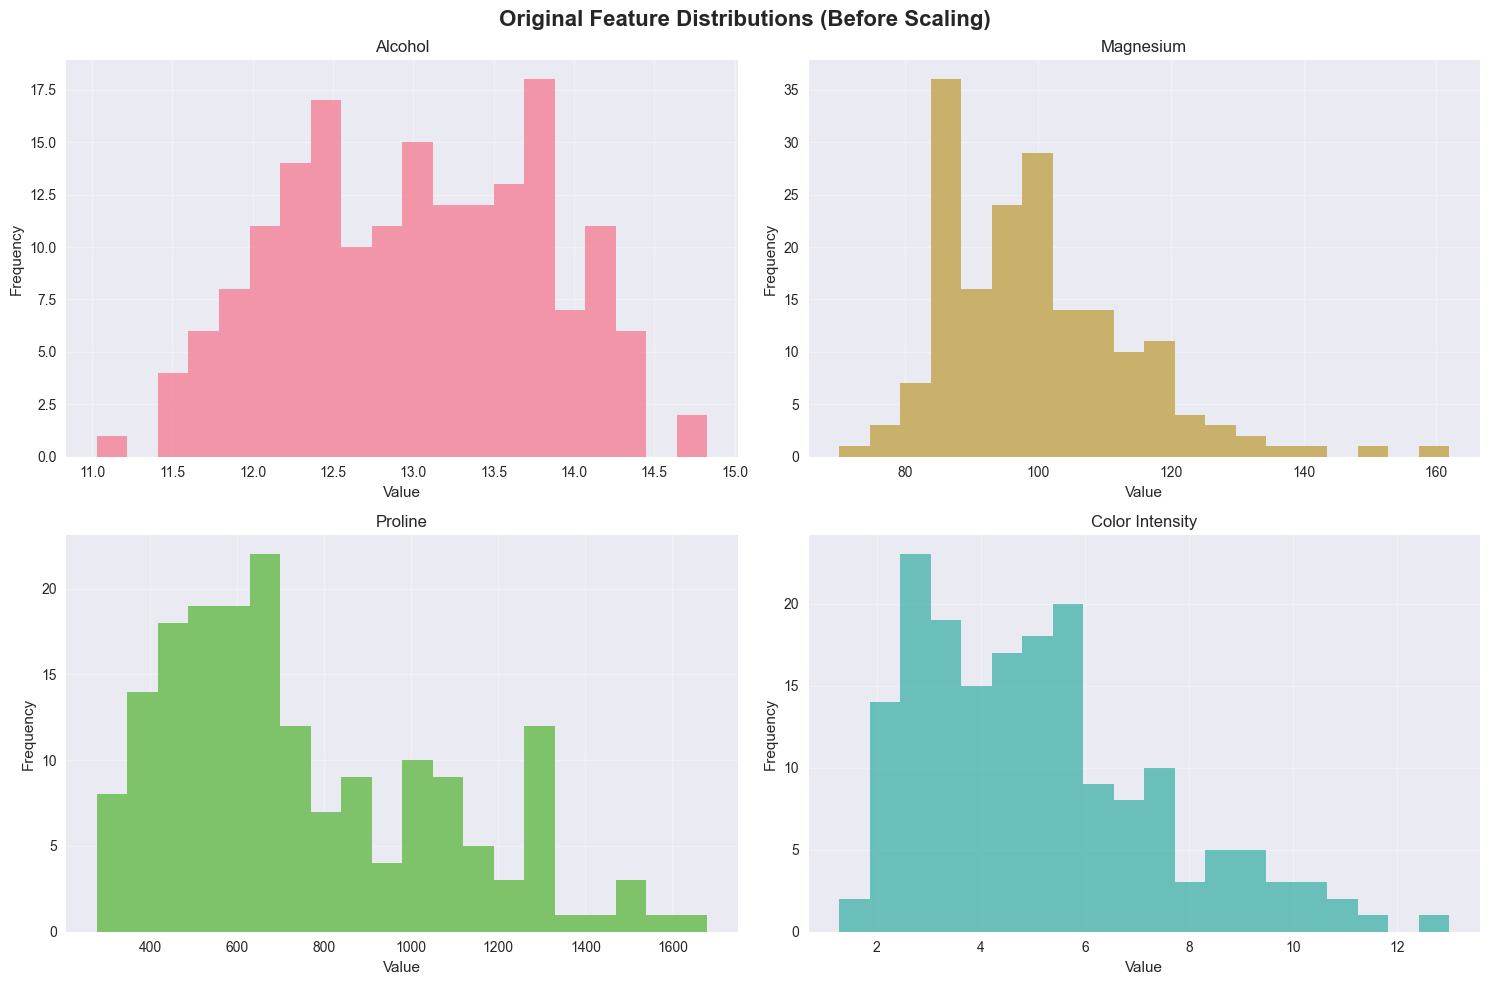

📊 Notice the vastly different scales! Proline ranges from ~200-1600 while Alcohol ranges from ~11-15


In [5]:
# Visualize the original distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Original Feature Distributions (Before Scaling)', fontsize=16, fontweight='bold')

for i, feature in enumerate(selected_features):
    row, col = i // 2, i % 2
    axes[row, col].hist(selected_data[feature], bins=20, alpha=0.7, color=f'C{i}')
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice the vastly different scales! Proline ranges from ~200-1600 while Alcohol ranges from ~11-15")

## 4. Split the Data

**Important**: Always split your data BEFORE scaling to prevent data leakage!

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("=== DATA SPLIT ===")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

=== DATA SPLIT ===
Training set: (124, 13)
Test set: (54, 13)
Training target distribution: [41 50 33]
Test target distribution: [18 21 15]


## 5. Scaling Technique #1: StandardScaler (Z-score Normalization)

**Formula**: $z = \frac{x - \mu}{\sigma}$

**Result**: Mean = 0, Standard Deviation = 1

**When to use**: When features are normally distributed and you want to center them around zero.

In [7]:
# Apply StandardScaler
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

print("=== STANDARDSCALER RESULTS ===")
print("Original training data statistics:")
print(f"Mean: {X_train.mean(axis=0)[:4].round(2)}")
print(f"Std:  {X_train.std(axis=0)[:4].round(2)}")

print("\nStandardized training data statistics:")
print(f"Mean: {X_train_standard.mean(axis=0)[:4].round(2)}")
print(f"Std:  {X_train_standard.std(axis=0)[:4].round(2)}")

print("\n StandardScaler: Mean ≈ 0, Std ≈ 1")

=== STANDARDSCALER RESULTS ===
Original training data statistics:
Mean: [12.96  2.29  2.36 19.67]
Std:  [0.81 1.06 0.27 3.37]

Standardized training data statistics:
Mean: [0. 0. 0. 0.]
Std:  [1. 1. 1. 1.]

 StandardScaler: Mean ≈ 0, Std ≈ 1


## 6. Scaling Technique #2: MinMaxScaler

**Formula**: $x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$

**Result**: Values scaled to [0, 1] range

**When to use**: When you need bounded values or when working with neural networks.

In [15]:
# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

print("=== MINMAXSCALER RESULTS ===")
print("Original training data range:")
print(f"Min: {X_train.min(axis=0)[:4].round(2)}")
print(f"Max: {X_train.max(axis=0)[:4].round(2)}")

print("\nMinMax scaled training data range:")
print(f"Min: {X_train_minmax.min(axis=0)[:4].round(2)}")
print(f"Max: {X_train_minmax.max(axis=0)[:4].round(2)}")

print("\nMinMaxScaler: All values in [0, 1] range")

=== MINMAXSCALER RESULTS ===
Original training data range:
Min: [11.03  0.74  1.36 10.6 ]
Max: [14.83  5.8   3.22 30.  ]

MinMax scaled training data range:
Min: [0. 0. 0. 0.]
Max: [1. 1. 1. 1.]

MinMaxScaler: All values in [0, 1] range


## 7. Scaling Technique #3: RobustScaler

**Formula**: $x_{scaled} = \frac{x - median}{IQR}$

**Result**: Uses median and interquartile range (robust to outliers)

**When to use**: When your data contains outliers that you want to minimize the impact of.

In [16]:
# Apply RobustScaler
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

print("=== ROBUSTSCALER RESULTS ===")
print("Original training data statistics:")
print(f"Median: {np.median(X_train, axis=0)[:4].round(2)}")
print(f"IQR:    {(np.percentile(X_train, 75, axis=0) - np.percentile(X_train, 25, axis=0))[:4].round(2)}")

print("\nRobust scaled training data statistics:")
print(f"Median: {np.median(X_train_robust, axis=0)[:4].round(2)}")
print(f"IQR:    {(np.percentile(X_train_robust, 75, axis=0) - np.percentile(X_train_robust, 25, axis=0))[:4].round(2)}")

print("\n RobustScaler: Median ≈ 0, IQR ≈ 1 (robust to outliers)")

=== ROBUSTSCALER RESULTS ===
Original training data statistics:
Median: [12.98  1.81  2.36 20.  ]
IQR:    [1.21 1.42 0.36 4.3 ]

Robust scaled training data statistics:
Median: [-0. -0.  0.  0.]
IQR:    [1. 1. 1. 1.]

 RobustScaler: Median ≈ 0, IQR ≈ 1 (robust to outliers)


## 8. Scaling Technique #4: Normalizer

**Formula**: $x_{scaled} = \frac{x}{||x||}$ (where ||x|| is the L2 norm)

**Result**: Each sample scaled to unit norm

**When to use**: When the direction of the data matters more than the magnitude (e.g., text analysis).

In [17]:
# Apply Normalizer
normalizer = Normalizer(norm='l2')
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

print("=== NORMALIZER RESULTS ===")
print("Original training data - first 3 samples L2 norms:")
original_norms = np.linalg.norm(X_train[:3], axis=1)
print(f"L2 norms: {original_norms.round(2)}")

print("\nNormalized training data - first 3 samples L2 norms:")
normalized_norms = np.linalg.norm(X_train_normalized[:3], axis=1)
print(f"L2 norms: {normalized_norms.round(2)}")

print("\n Normalizer: Each sample has unit L2 norm (≈ 1.0)")

=== NORMALIZER RESULTS ===
Original training data - first 3 samples L2 norms:
L2 norms: [1323.19 1289.26  887.12]

Normalized training data - first 3 samples L2 norms:
L2 norms: [1. 1. 1.]

 Normalizer: Each sample has unit L2 norm (≈ 1.0)


## 9. Visual Comparison of All Scaling Techniques

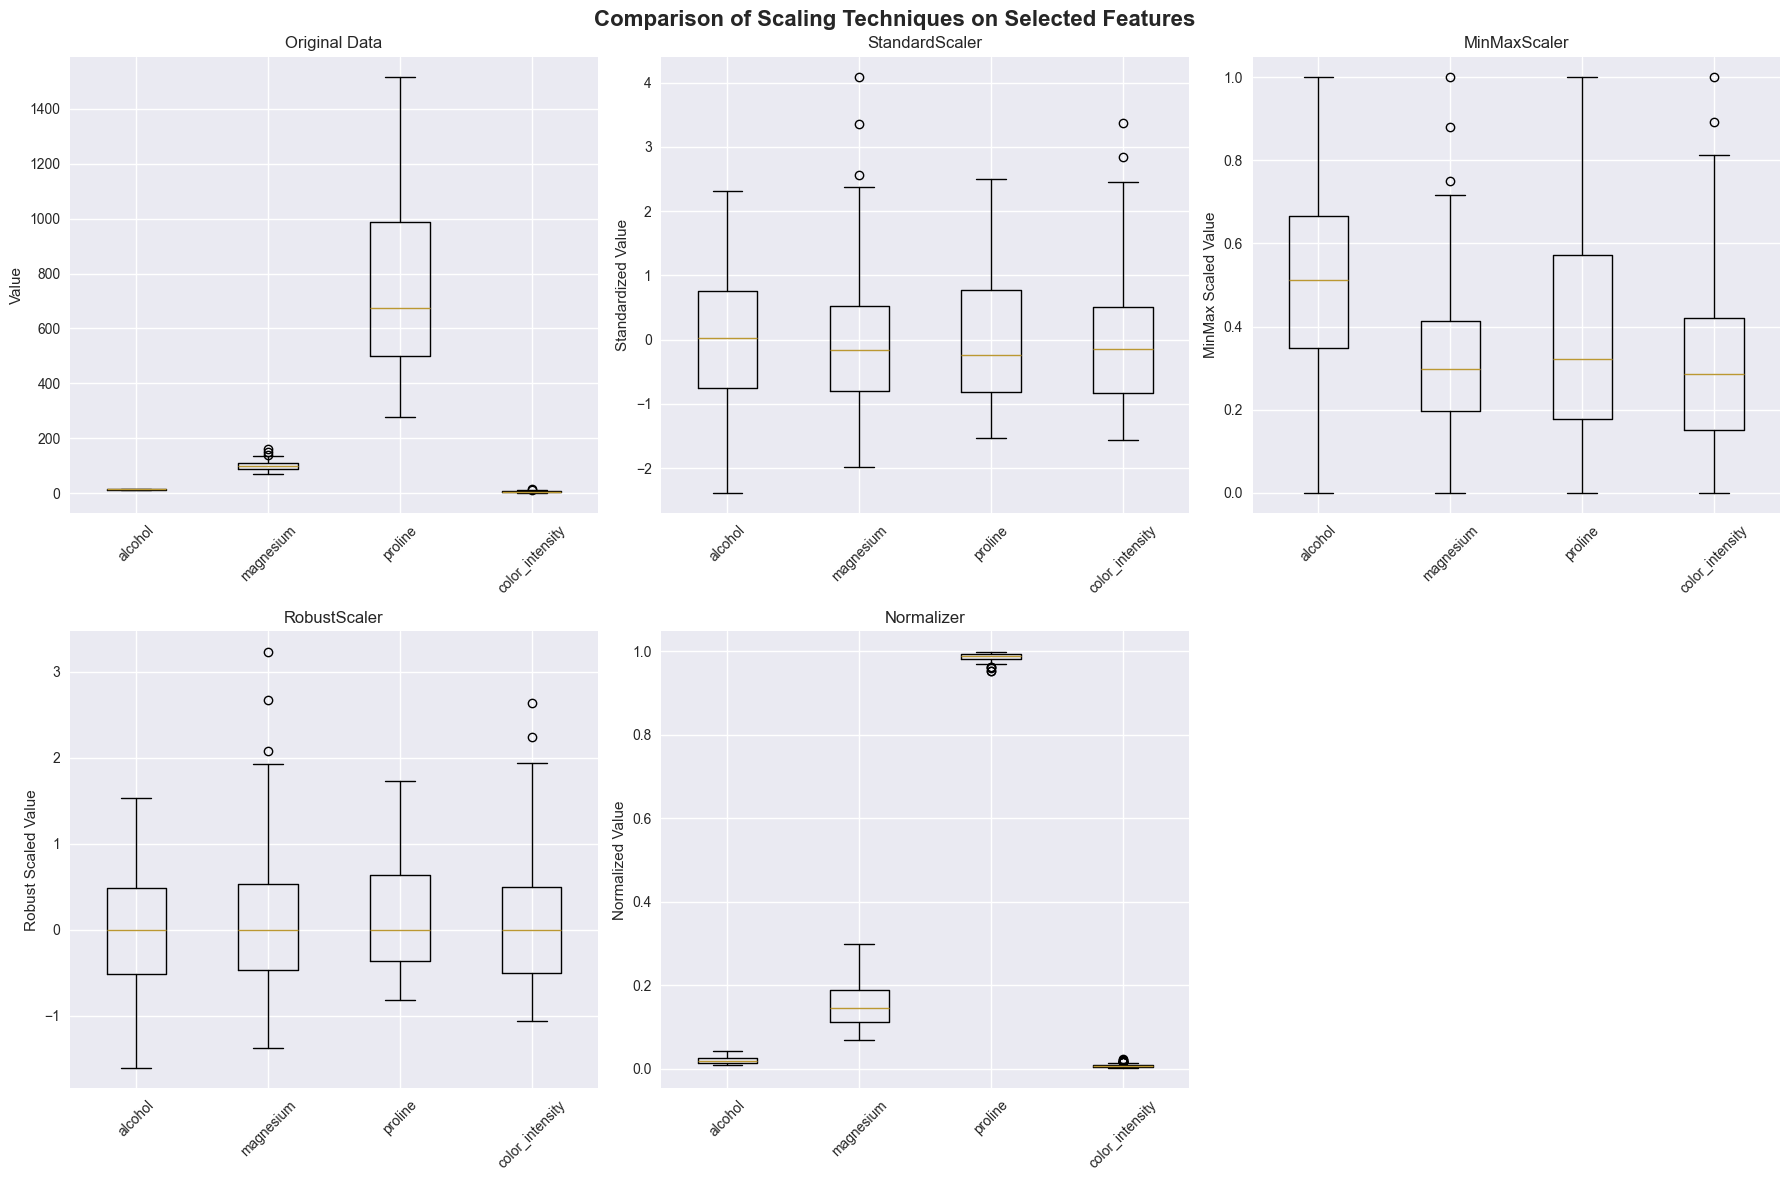

📊 Notice how each scaling method affects the data distribution differently!


In [12]:
# Create comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparison of Scaling Techniques on Selected Features', fontsize=16, fontweight='bold')

# Get indices for selected features
selected_indices = [list(feature_names).index(feat) for feat in selected_features]

# Original data
axes[0, 0].boxplot([X_train[:, idx] for idx in selected_indices], labels=selected_features)
axes[0, 0].set_title('Original Data')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylabel('Value')

# StandardScaler
axes[0, 1].boxplot([X_train_standard[:, idx] for idx in selected_indices], labels=selected_features)
axes[0, 1].set_title('StandardScaler')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylabel('Standardized Value')

# MinMaxScaler
axes[0, 2].boxplot([X_train_minmax[:, idx] for idx in selected_indices], labels=selected_features)
axes[0, 2].set_title('MinMaxScaler')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].set_ylabel('MinMax Scaled Value')

# RobustScaler
axes[1, 0].boxplot([X_train_robust[:, idx] for idx in selected_indices], labels=selected_features)
axes[1, 0].set_title('RobustScaler')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylabel('Robust Scaled Value')

# Normalizer
axes[1, 1].boxplot([X_train_normalized[:, idx] for idx in selected_indices], labels=selected_features)
axes[1, 1].set_title('Normalizer')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylabel('Normalized Value')

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

print("Notice how each scaling method affects the data distribution differently!")

## 10. Impact on Machine Learning Performance

Let's see how different scaling techniques affect the performance of a K-Nearest Neighbors classifier.

In [13]:
# Test KNN performance with different scalers
def test_knn_performance(X_train, X_test, y_train, y_test, scaler_name):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Test all scaling methods
results = {}
results['No Scaling'] = test_knn_performance(X_train, X_test, y_train, y_test, 'No Scaling')
results['StandardScaler'] = test_knn_performance(X_train_standard, X_test_standard, y_train, y_test, 'StandardScaler')
results['MinMaxScaler'] = test_knn_performance(X_train_minmax, X_test_minmax, y_train, y_test, 'MinMaxScaler')
results['RobustScaler'] = test_knn_performance(X_train_robust, X_test_robust, y_train, y_test, 'RobustScaler')
results['Normalizer'] = test_knn_performance(X_train_normalized, X_test_normalized, y_train, y_test, 'Normalizer')

print("=== KNN CLASSIFIER PERFORMANCE COMPARISON ===")
for method, accuracy in results.items():
    print(f"{method:15s}: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Find best performing method
best_method = max(results, key=results.get)
print(f"\n Best performing method: {best_method} with {results[best_method]*100:.2f}% accuracy")

=== KNN CLASSIFIER PERFORMANCE COMPARISON ===
No Scaling     : 0.7222 (72.22%)
StandardScaler : 0.9444 (94.44%)
MinMaxScaler   : 0.9630 (96.30%)
RobustScaler   : 0.9259 (92.59%)
Normalizer     : 0.8333 (83.33%)

 Best performing method: MinMaxScaler with 96.30% accuracy


In [ ]:
# Visualize performance comparison
plt.figure(figsize=(12, 6))
methods = list(results.keys())
accuracies = list(results.values())

bars = plt.bar(methods, accuracies, color=['red', 'blue', 'green', 'orange', 'purple'], alpha=0.7)
plt.title('KNN Classifier Performance with Different Scaling Techniques', fontsize=14, fontweight='bold')
plt.xlabel('Scaling Method')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Scaling dramatically improves KNN performance! This is because KNN uses distance calculations.")

## 11. When to Use Each Scaler - Decision Guide

| Scaler | Use When | Avoid When | Best For |
|--------|----------|------------|---------|
| **StandardScaler** | Data is normally distributed | Heavy outliers present | Neural networks, SVM, PCA |
| **MinMaxScaler** | Need bounded range [0,1] | Outliers present | Neural networks, image processing |
| **RobustScaler** | Outliers are present | Need exact [0,1] range | Data with outliers |
| **Normalizer** | Sample-wise scaling needed | Feature-wise scaling needed | Text analysis, recommendations |

## 12. Best Practices and Key Takeaways

### Best Practices:
1. **Always fit on training data only** - Prevents data leakage
2. **Apply same transformation to test data** - Use the fitted scaler
3. **Choose based on data distribution** - Check for outliers first
4. **Consider algorithm requirements** - Some algorithms are scale-invariant
5. **Experiment with different scalers** - Use cross-validation to choose

### Key Insights:
- **Scale matters**: Features with larger scales dominate distance-based algorithms
- **No universal solution**: Different scalers work better for different data types
- **Performance impact**: Proper scaling can dramatically improve model performance
- **Preprocessing pipeline**: Scaling should be part of your preprocessing pipeline

### Common Mistakes to Avoid:
- Fitting scaler on entire dataset (including test data)
- Using different scalers for training and test data
- Not considering the nature of your data when choosing a scaler
- Forgetting to scale new data when making predictions